In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler



In [30]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier data manipulation and visualization
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])
df['target'] = df['target'].map(dict(enumerate(iris.target_names)))



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


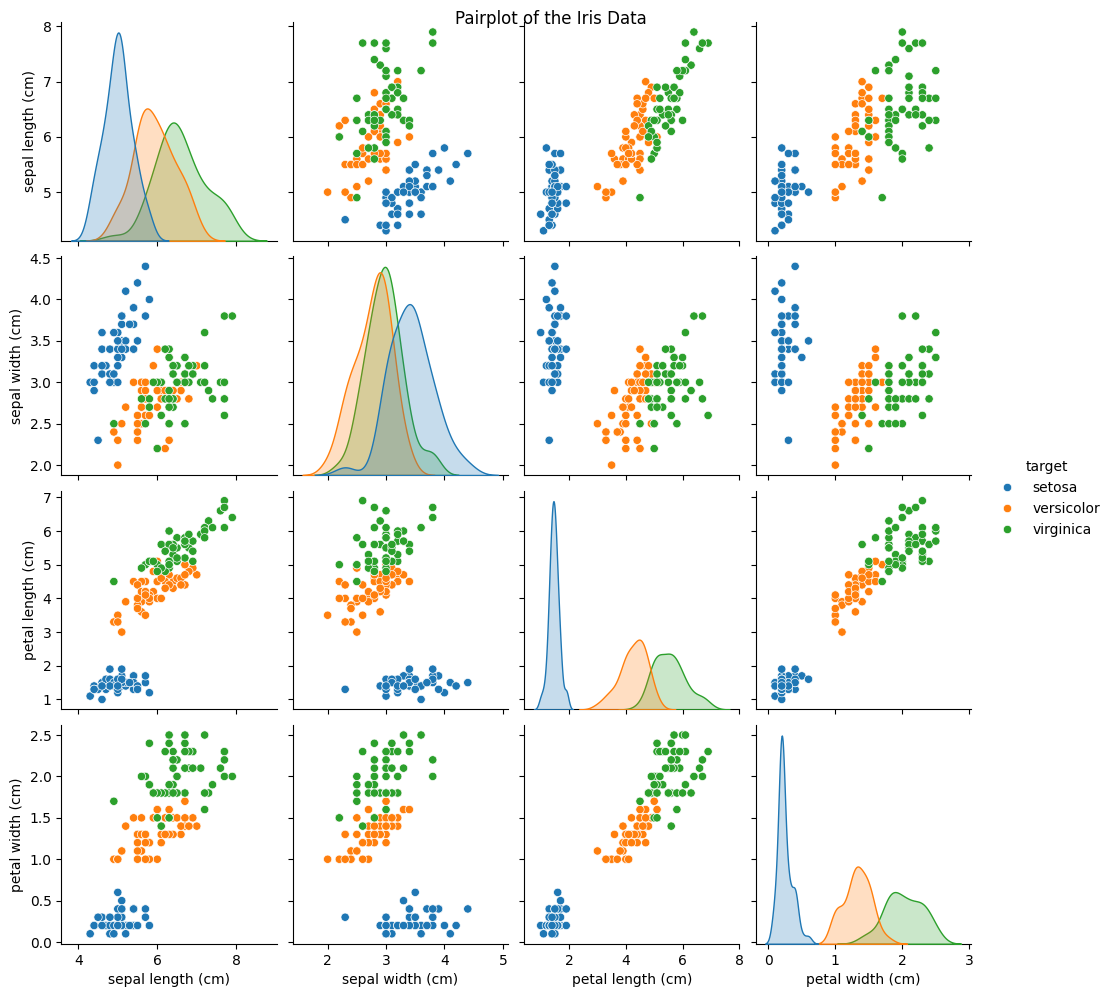

In [31]:
# Data Exploration (optional, but good practice)
print(df.head())
sns.pairplot(df, hue='target')
plt.suptitle("Pairplot of the Iris Data", verticalalignment='baseline')
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [32]:
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=32)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Grid Search Score: {grid_search.best_score_:.2f}")

"""    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]"""




Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth

"    'n_estimators': [50, 100, 200],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]"

In [33]:
# Train the model with best parameters
rf_clf_best = grid_search.best_estimator_

# Predictions
y_pred = rf_clf_best.predict(X_test_scaled)

# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



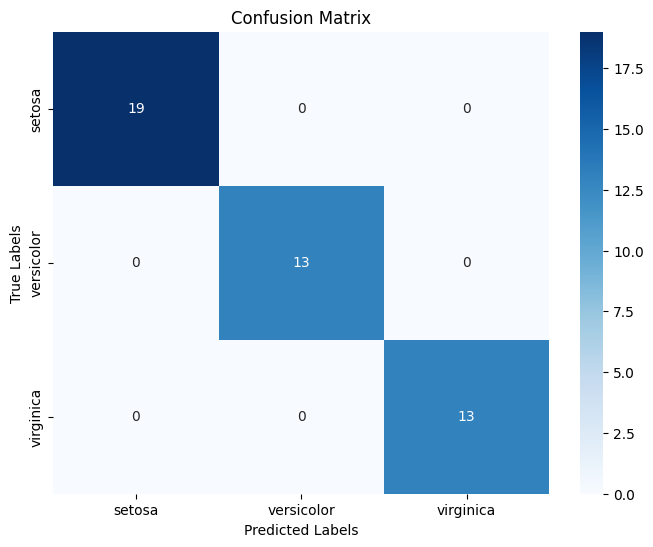

In [34]:
# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



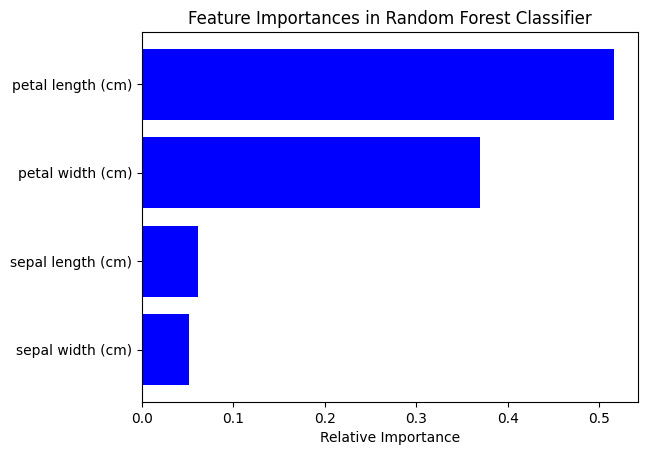

In [35]:
# Feature Importances Visualization
features = iris.feature_names
importances = rf_clf_best.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances in Random Forest Classifier')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Explanation and Conclusion
# This enhanced script covers a complete workflow of using Random Forest in a classification task,
# from data exploration to hyperparameter tuning, model evaluation, and visualization.
# The visualizations provide insights into the model's performance and the importance of features.
# The use of GridSearchCV for hyperparameter tuning helps in finding the optimal model configuration to improve accuracy.


In [36]:
# Extract the Best Parameters from GridSearch

best_params = grid_search.best_params_
print(best_params)  # Check what the best hyperparameters are



{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}


In [37]:
# Train a New RandomForestClassifier Using the Best Parameters

best_rf = RandomForestClassifier(**best_params, random_state=42)  # Use the best hyperparameters
best_rf.fit(X_train, y_train)  # Fit it again


RandomForestClassifier(min_samples_split=10, n_estimators=10, random_state=42)

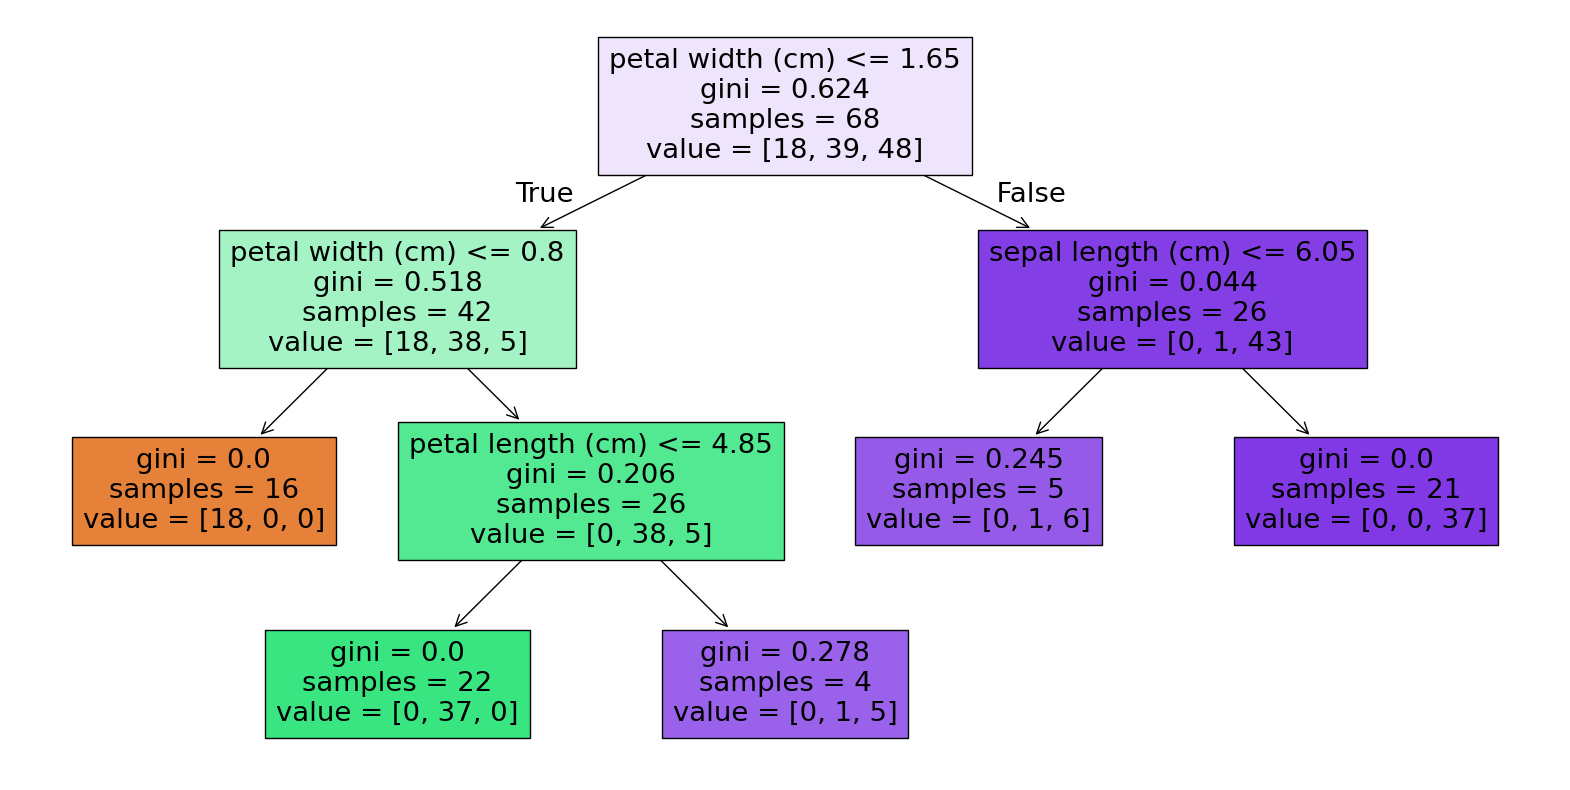

In [38]:
# Access estimators_ and Plot Trees

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Select and plot the first tree
tree = best_rf.estimators_[0]

plt.figure(figsize=(20, 10))
# Use iris.feature_names instead of X_train.columns
plot_tree(tree, filled=True, feature_names=iris.feature_names)  # Add class_names if applicable
plt.show()

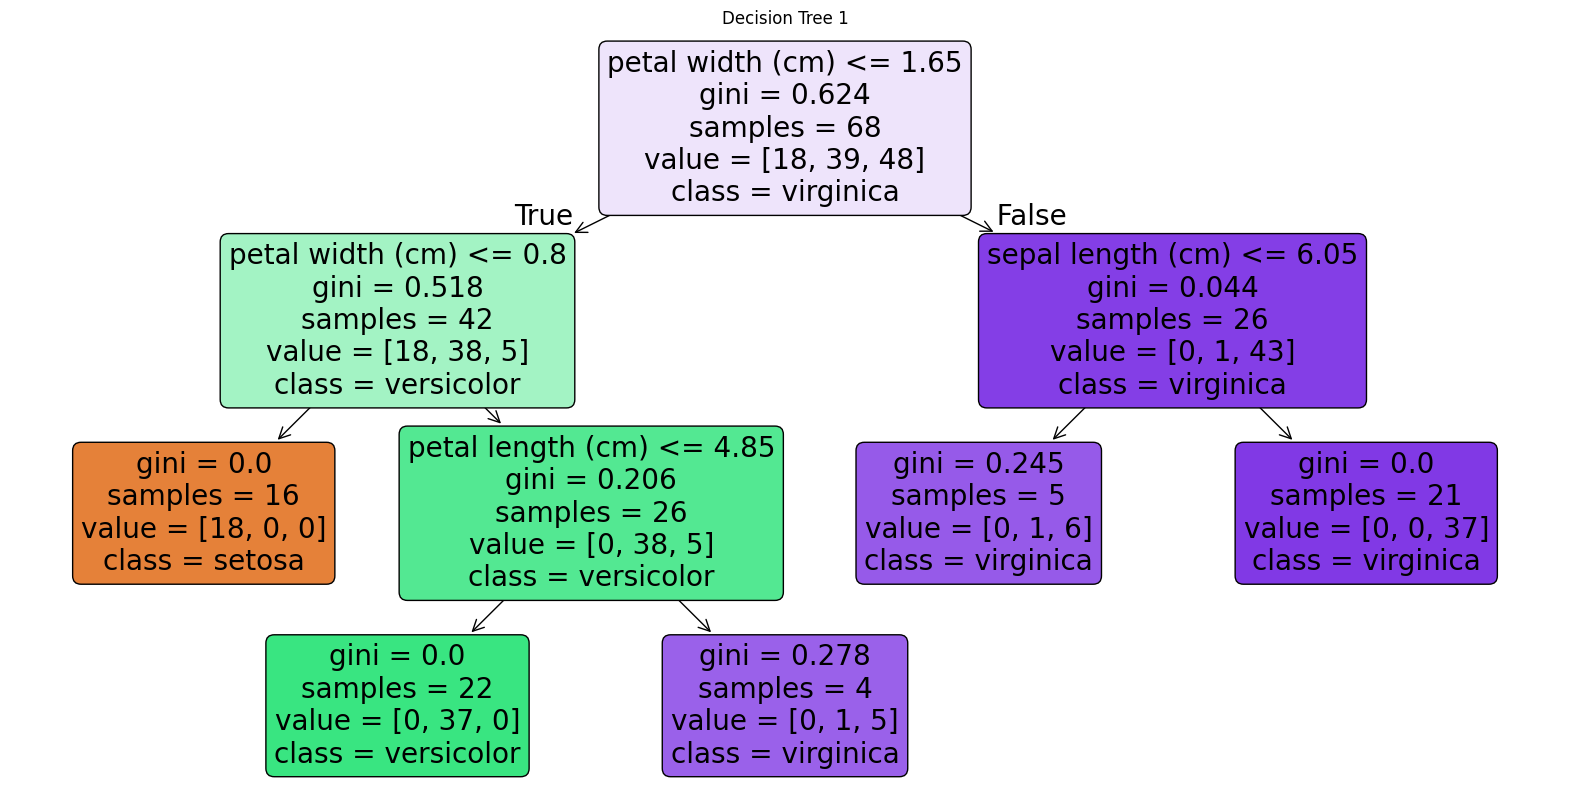

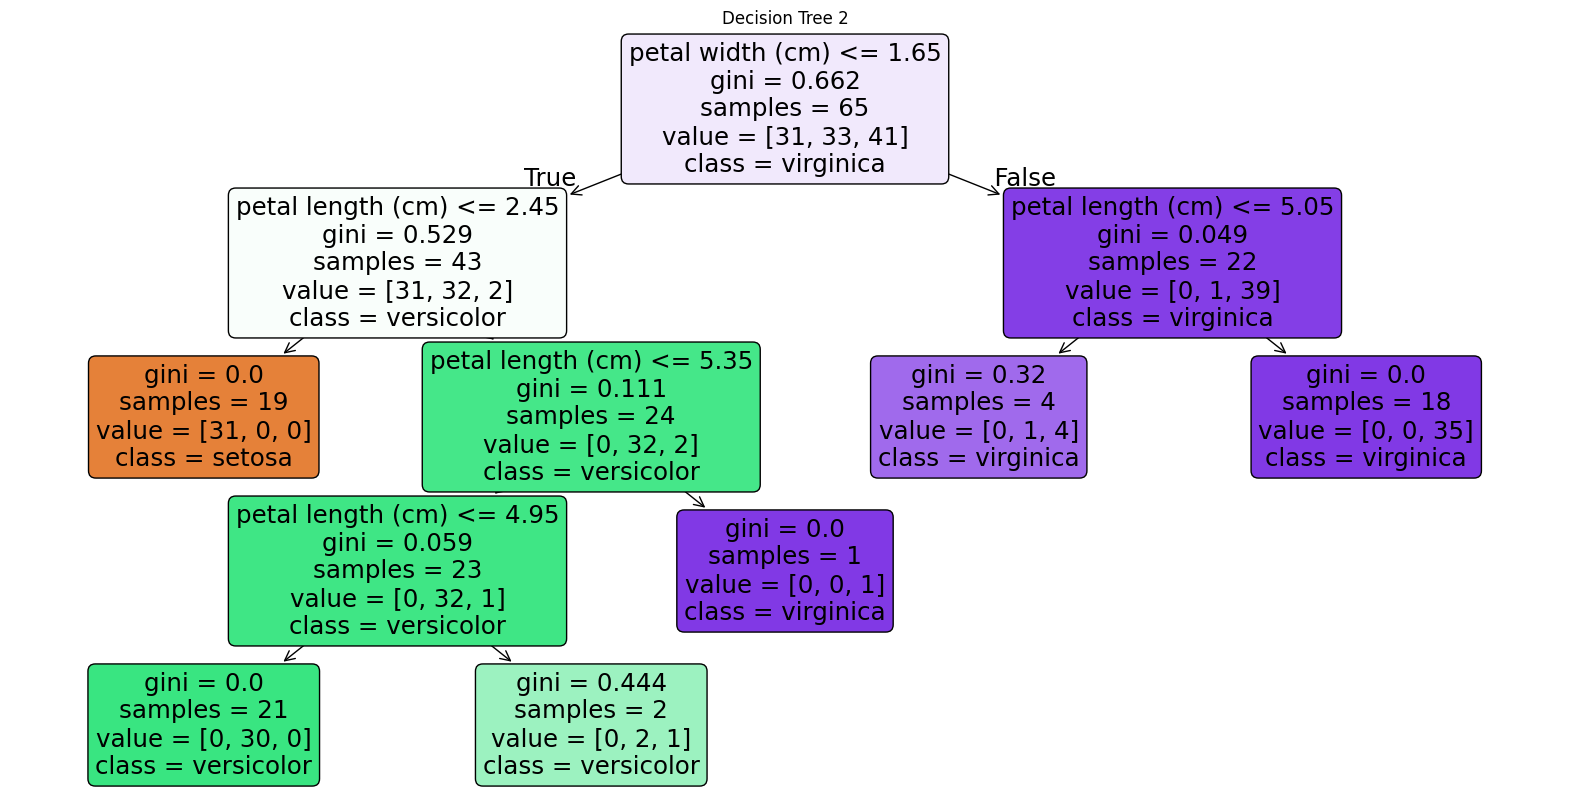

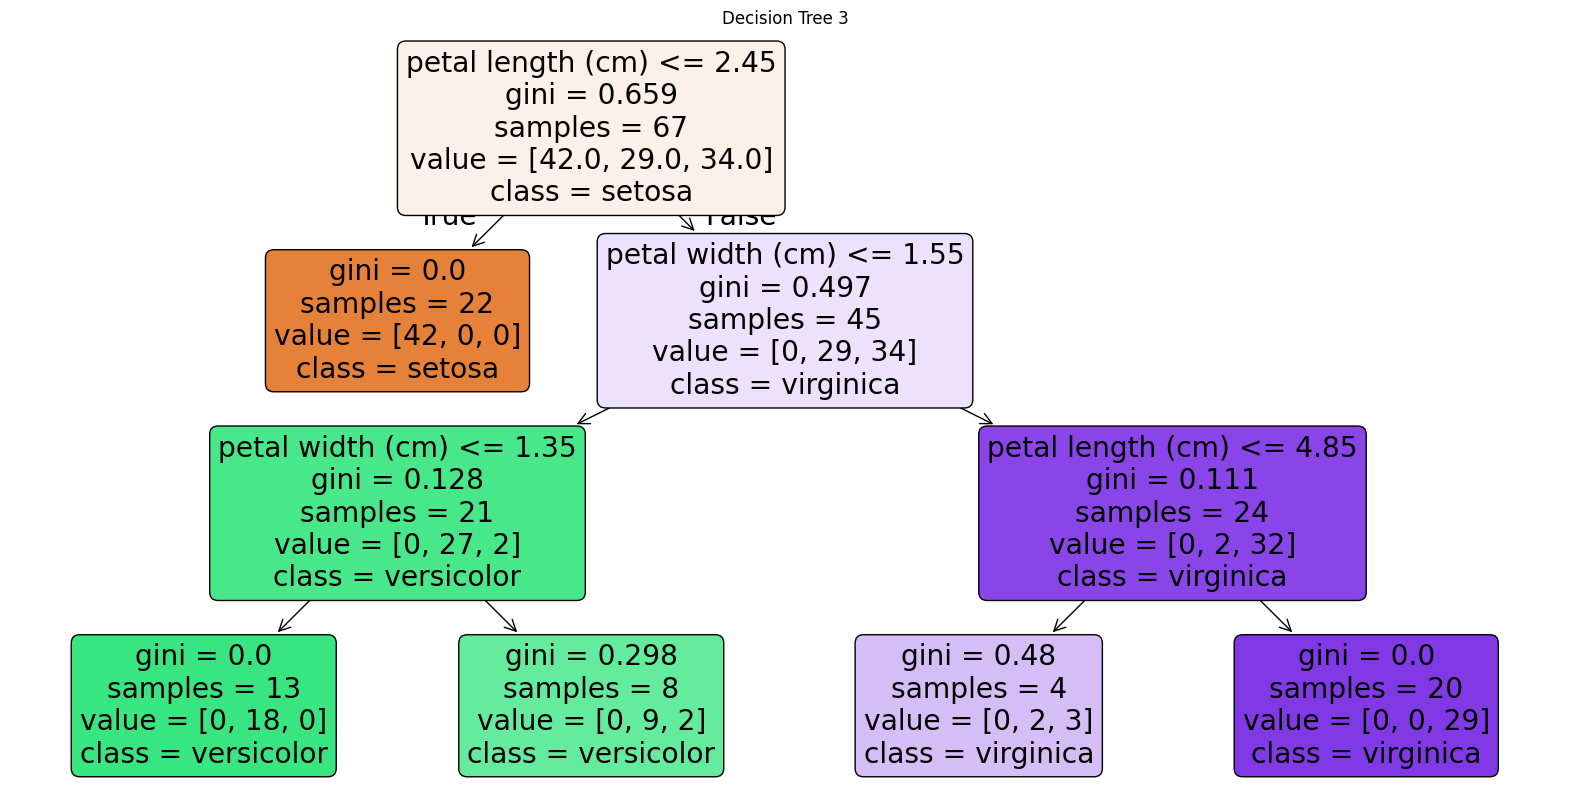

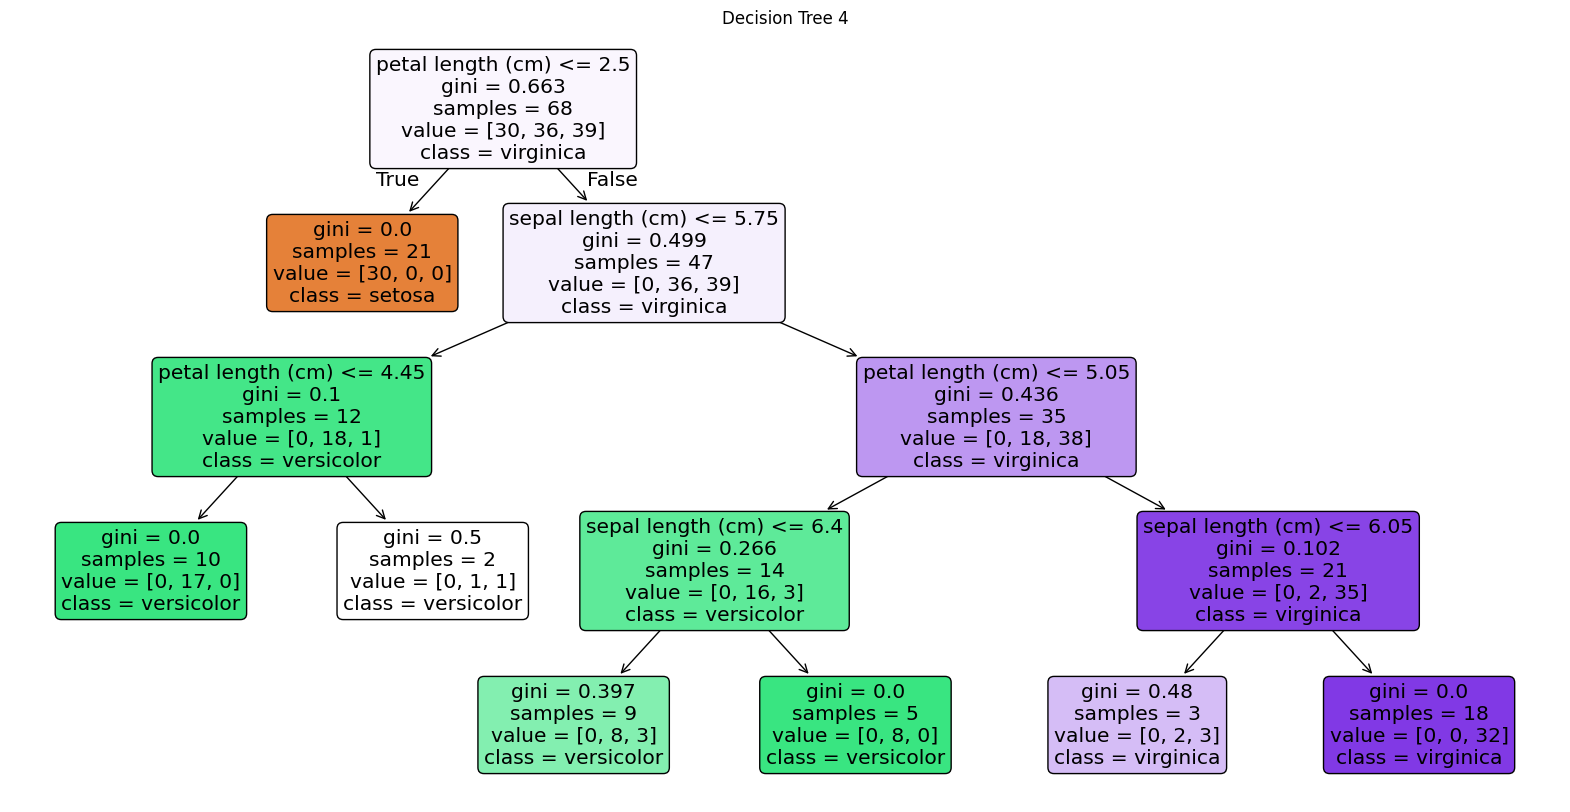

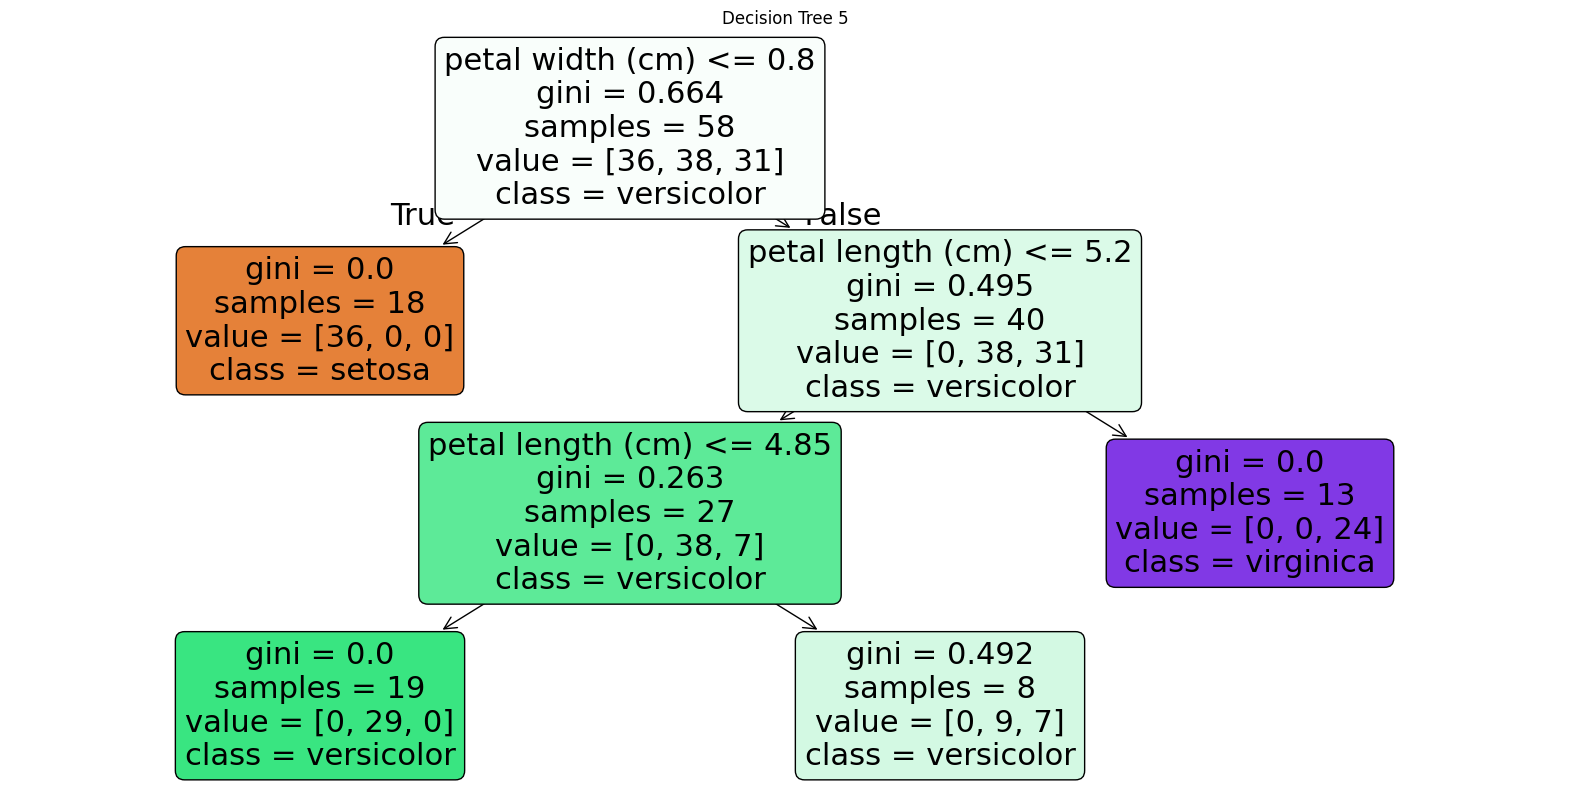

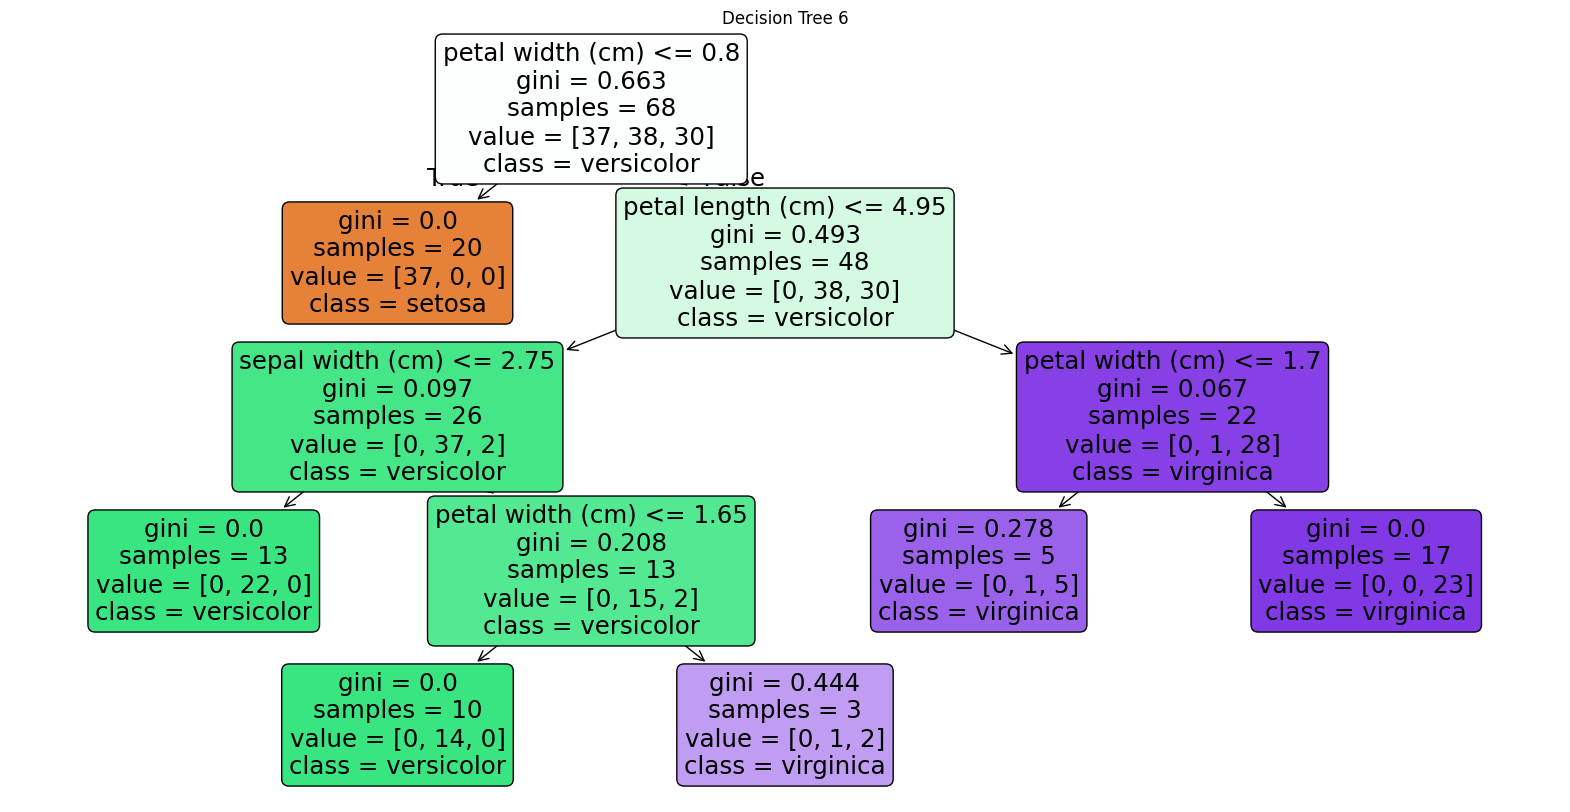

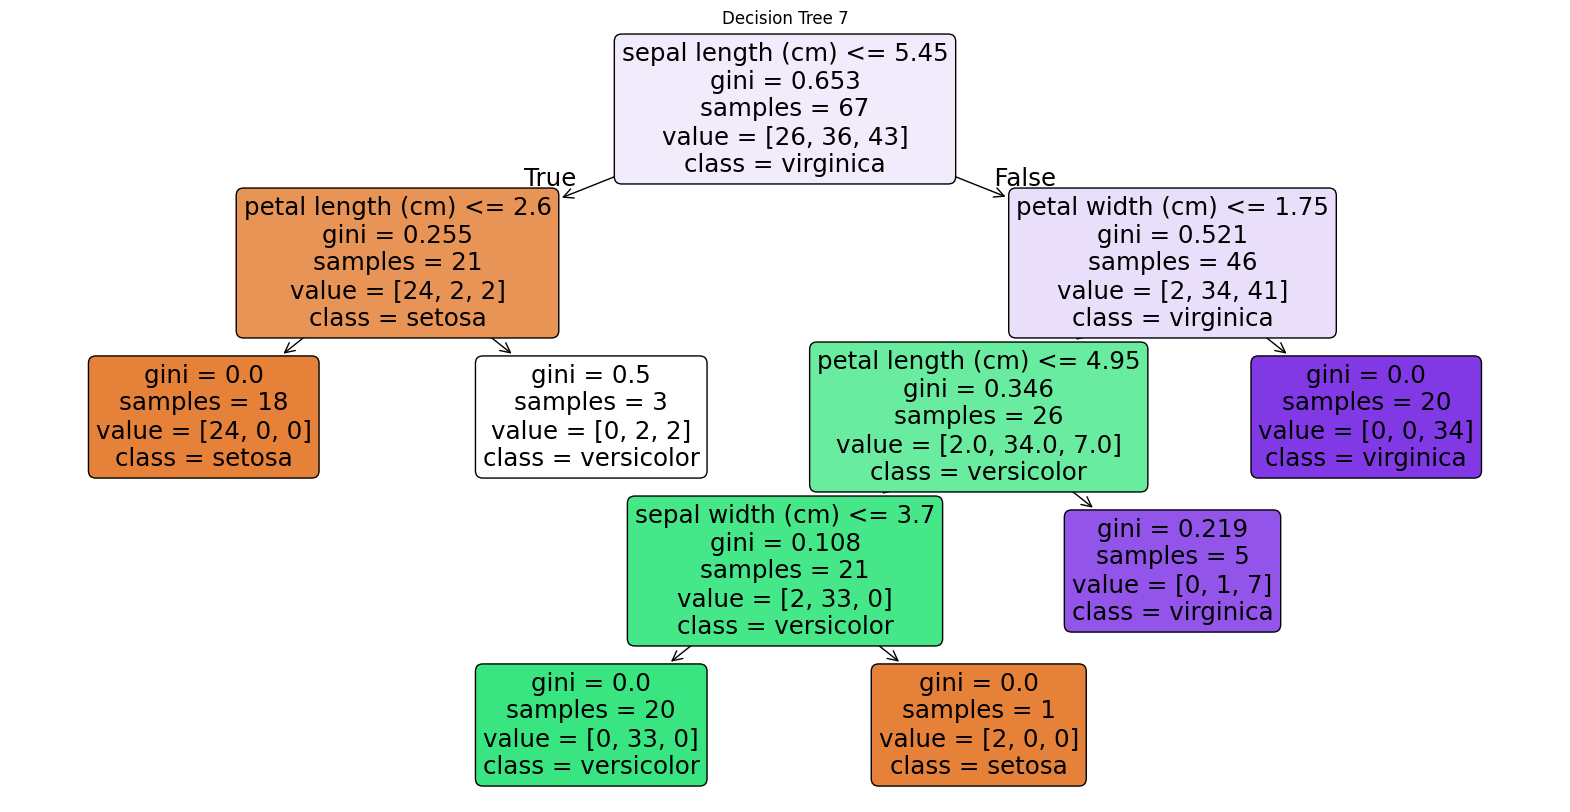

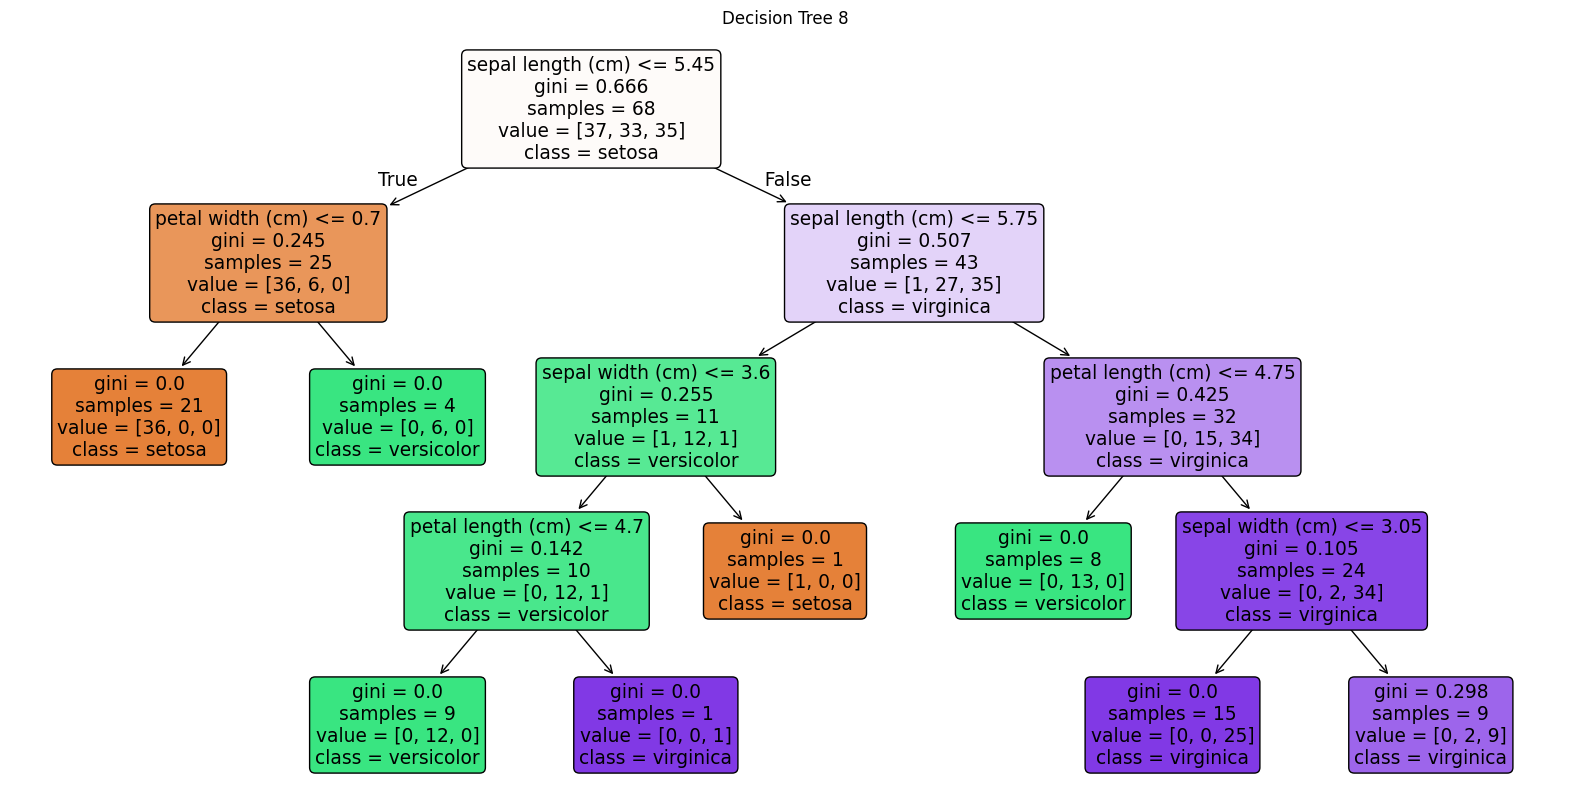

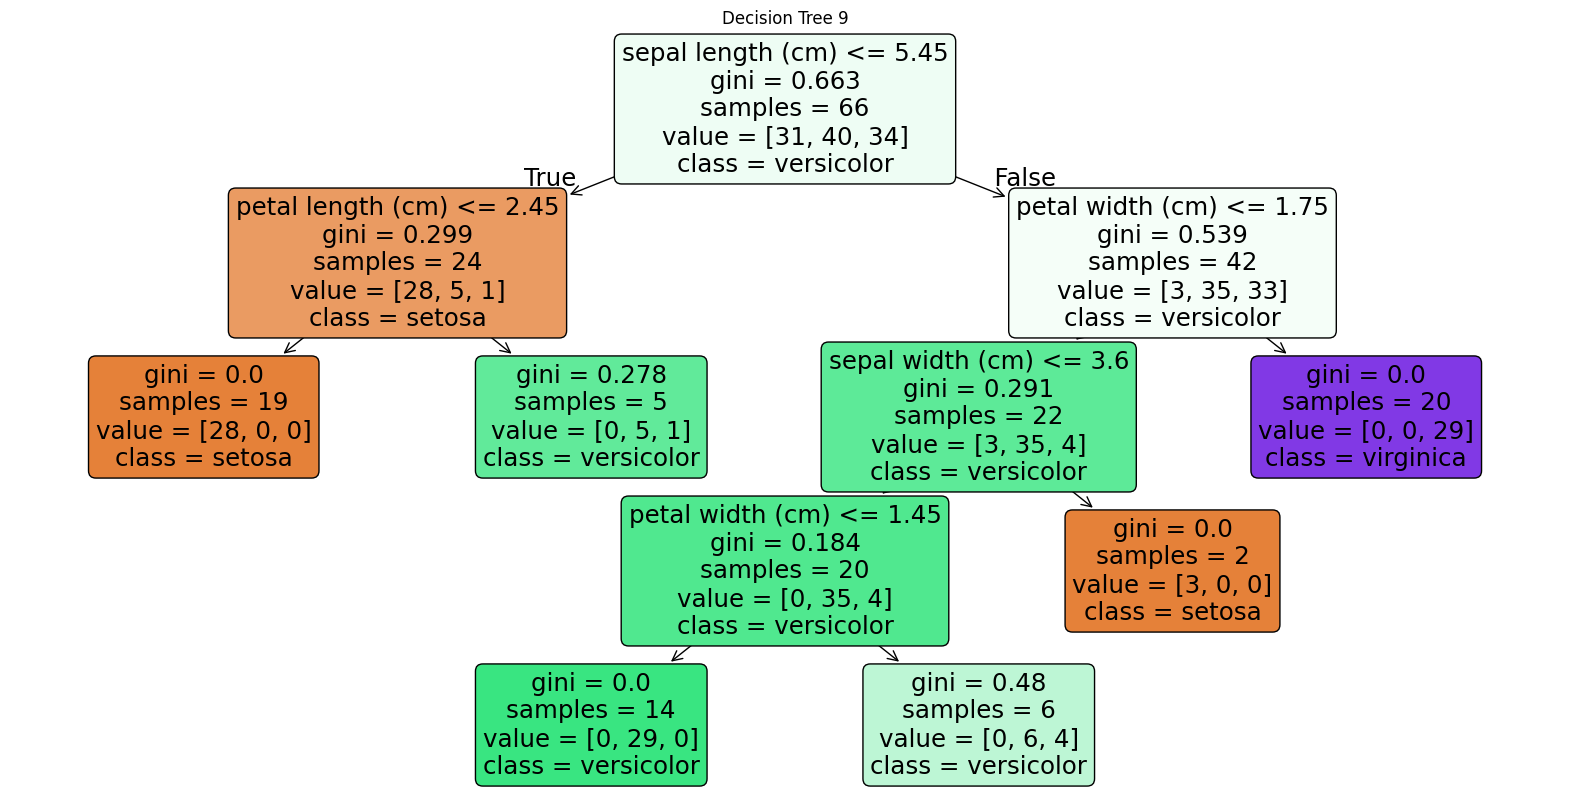

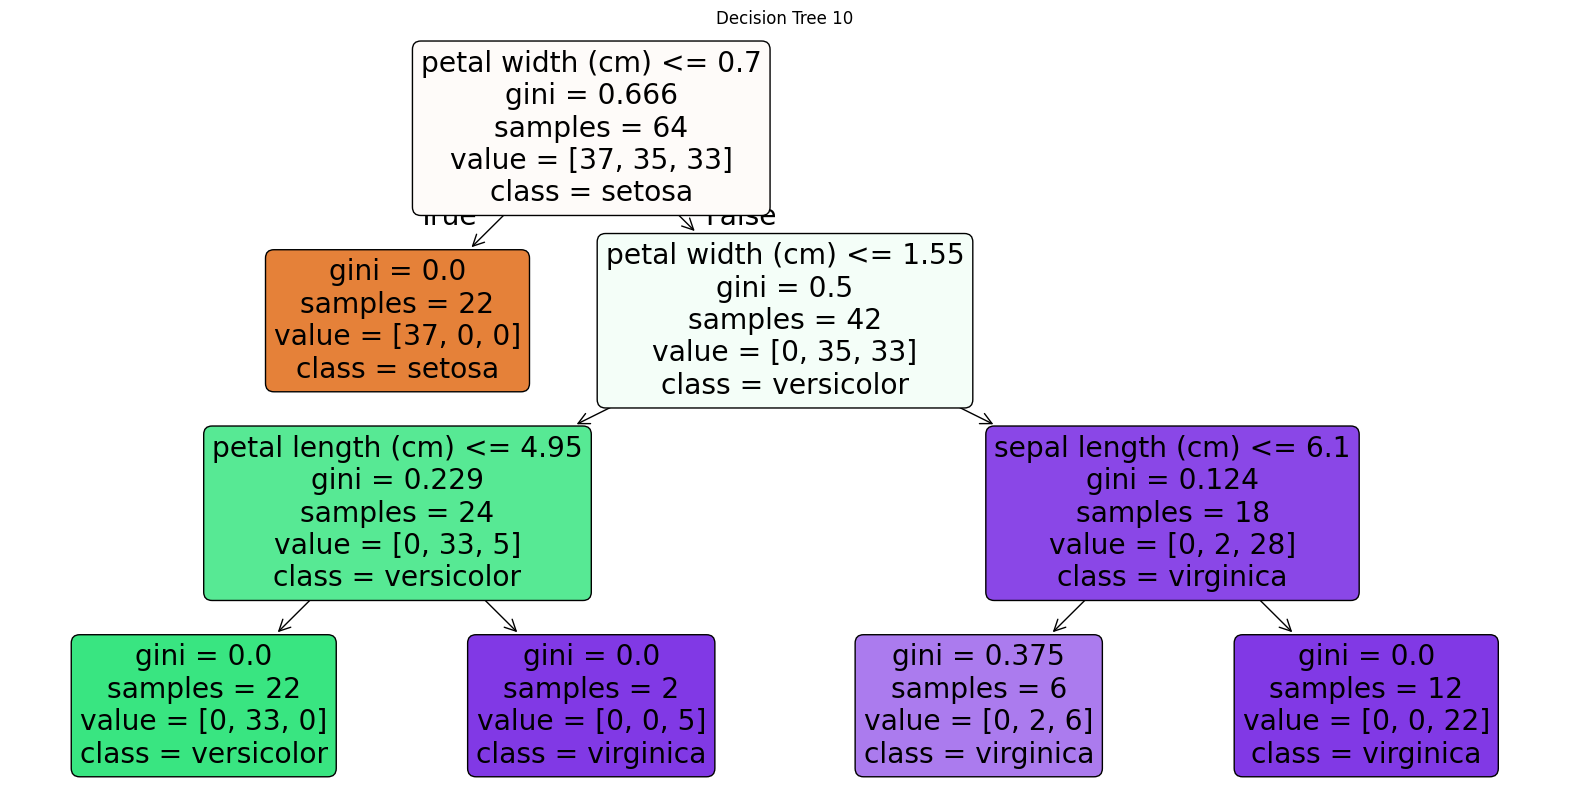

In [39]:
# Plot the first 3 trees (you can change the number)
for i in range(10):
    plt.figure(figsize=(20, 10))  # Adjust figure size as needed
    plot_tree(best_rf.estimators_[i],
              filled=True,
              feature_names=iris.feature_names,
              class_names=iris.target_names,
              rounded=True)  # For better visualization
    plt.title(f"Decision Tree {i + 1}")
    plt.show()

# New Section